# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [4]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=4, SampleSizes=[5])

In [5]:
print(np.shape(Array))

(4, 1, 88, 5, 2, 1)


[0, 1, 2, 3]
[-0.39, -0.29000000000000004, -0.18000000000000002, -0.08000000000000002, 0.029999999999999992, 0.13, 0.24000000000000002, 0.34]


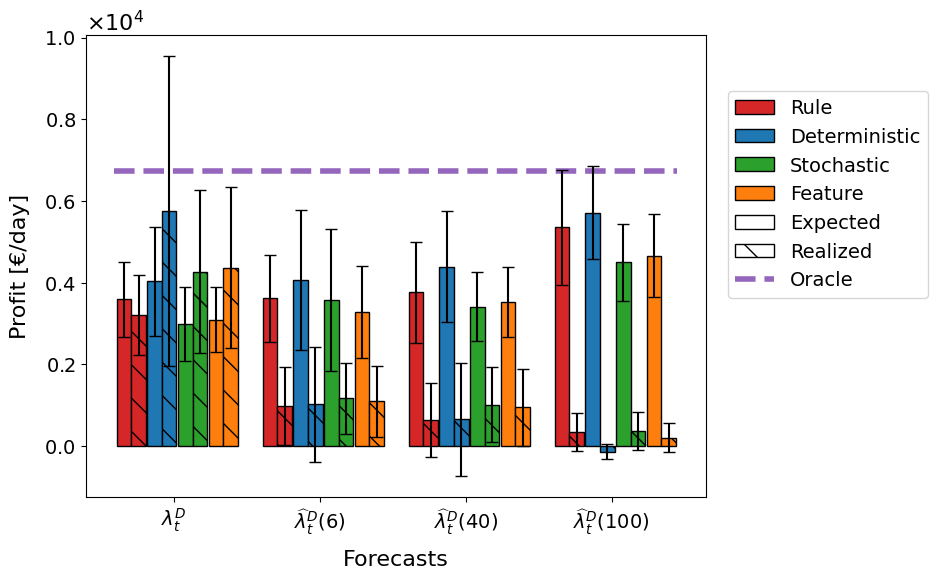

In [7]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(6)$","$\widehat{\lambda}_{t}^{D}(40)$","$\widehat{\lambda}_{t}^{D}(100)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ["Expected",'Realized'], barwidth = 0.1, pdf_name = 'Profit_bar_forecast',ShowEachTestDay = False,save = False)